date    pce       pop  psavert  uempmed  unemploy
0  1967-07-01  506.7  198712.0     12.6      4.5      2944

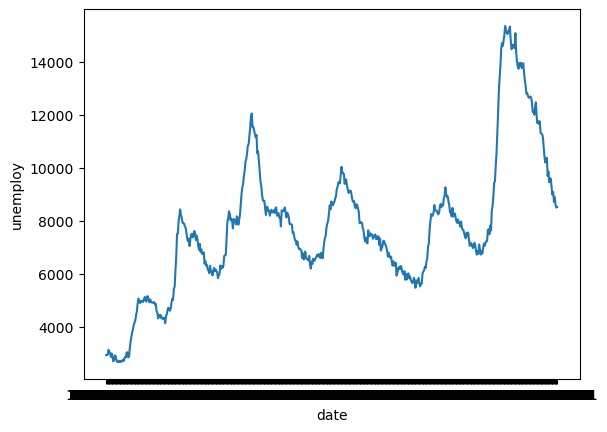

In [29]:
# [ 8장 ]
import pandas as pd
import seaborn as sns
economics = pd.read_csv('../Data/economics.csv')
# economics.shape   # 파일 데이터 열, 행 개수 확인
# economics.info()  # 널값 개수 확인
# economics.describe()
sns.lineplot(data = economics, x = 'date', y = 'unemploy')
economics.head(1)

In [31]:
economics['날짜'] = pd.to_datetime(economics['date'])
economics.head(1)
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   날짜        574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [35]:
economics['year'] = economics['날짜'].dt.year
economics['month'] = economics['날짜'].dt.month
economics['day'] = economics['날짜'].dt.day
economics.head(1)

date    pce       pop  psavert  uempmed  unemploy         날짜  year  \
0  1967-07-01  506.7  198712.0     12.6      4.5      2944 1967-07-01  1967   

   month  day  
0      7    1

<Axes: xlabel='year', ylabel='unemploy'>

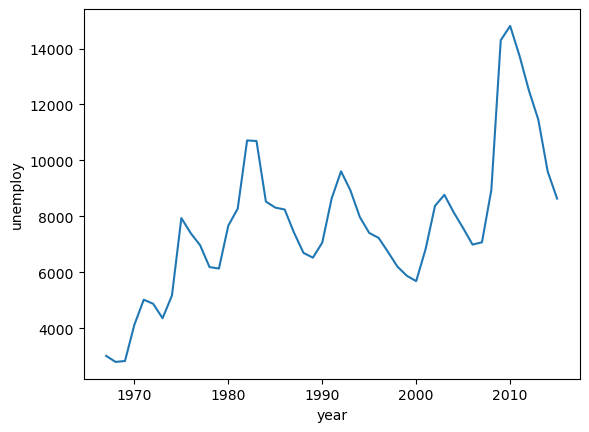

In [39]:
#sns.lineplot(data = economics, x = 'year', y = 'unemploy') # 적당히 값을 샘플링해서 보여줌. 그래서 오차범위가 그림자처럼 나타남.(정확한 값을 계산하여 평균값에 점을 찍어 도출된 결과가 아님.)
sns.lineplot(data = economics, x = 'year', y = 'unemploy', errorbar=None) # 오차범위 숨겨줌

<Axes: xlabel='month', ylabel='unemploy'>

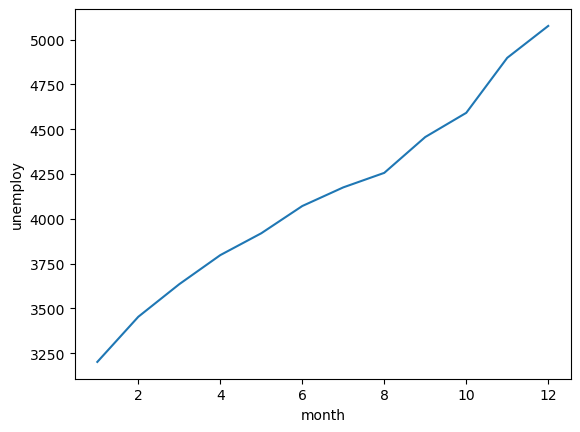

In [41]:
# 1970년 월별 실업자수의 라인그래프를 그려라
result = economics.query('year == 1970')
sns.lineplot(data = result, x = 'month', y = 'unemploy')

In [43]:
mpg = pd.read_csv('../Data/mpg.csv')

<Axes: xlabel='drv', ylabel='cty'>

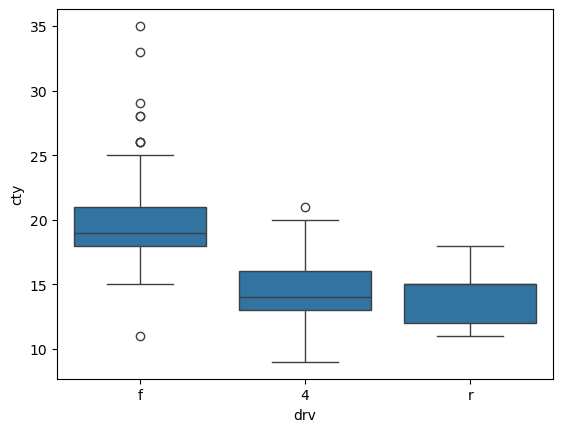

In [49]:
# 4 / r / f 에 따른 도심 연비 분포를 알고 싶다.
sns.boxplot(data = mpg, x = 'drv', y = 'cty')

In [139]:
# [미니 프로젝트 - 기온 데이터 분석]
temp = pd.read_csv('temp.csv', encoding='cp949', header=6)
temp.head(1)
# 불편한 부분 발생, 날짜 앞에 \t 탭이 있음. 컬럼명에 도씨 붙어있어서 입력할 때 불편함.

날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0  \t1907-10-01  108     13.5      7.9     20.7

In [81]:
# 1. 컬럼명 변경
temp = temp.rename(columns={'평균기온(℃)' : '평균',
                            '최저기온(℃)' : '최저',
                            '최고기온(℃)' : '최고'})
# 2. 날짜의 \t 제거
temp['날짜'] = temp['날짜'].str.replace('\t', '')  # '\t'을 빈칸('')으로 변경

temp.head(1)

날짜   지점    평균   최저    최고
0  1907-10-01  108  13.5  7.9  20.7

In [93]:
temp.head()
#빈값이 있는가?
# isna, fillna, dropna
# temp.isna().sum()
# temp['평균'].fillna(100)
# temp['최저'].fillna(-100)
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42326 entries, 0 to 42325
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      42326 non-null  object 
 1   지점      42326 non-null  int64  
 2   평균      41570 non-null  float64
 3   최저      41567 non-null  float64
 4   최고      41567 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='month', ylabel='평균'>

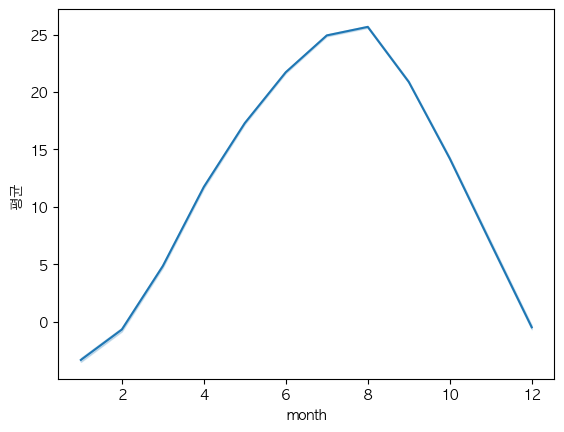

In [137]:
# 혼자 해보기!
# 1. '날짜' 컬럼을 datetime으로 변경하기
temp['날짜'] = pd.to_datetime(temp['날짜'])
#temp.info()

# 2. year, month, day 추출해서 파생변수로 생성하기
temp['year'] = temp['날짜'].dt.year
temp['month'] = temp['날짜'].dt.month
temp['day'] = temp['날짜'].dt.day

# 3. 매일 '일교차' 컬럼을 추가하라, 최고-최저
temp = temp.assign(일교차 = temp['최고'] - temp['최저'])
# 4. 일교차가 큰 순서로 top 10을 찾아라
temp = temp.sort_values('일교차', ascending=False)
temp.head(10)
# 5. 100년동안 월별 평균온도의 평균 데이터를 찾아라. 그래프를 그려라.
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})

result = temp.query('year > 1924')
sns.lineplot(data = result, x = 'month', y = '평균')